In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [22]:
%matplotlib inline

In [3]:
demo_request = requests.get(r'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&outputsize=full&apikey=demo')

In [4]:
demo_request.json()
demo_json = demo_request.json()

In [5]:
demo_df = pd.DataFrame.from_dict(demo_json['Time Series (Daily)'], orient='index')
demo_df

# rows 1 to 5, columns 2 to 4
# demo_df.iloc[1: 5, 2:4]

# demo_df.loc['2025-04-2': '2025-03-25', '1. open': '4. close']
# demo_df.loc['2025-04-02': '2025-03-25', ['1. open', '4. close']]



,1. open,2. high,3. low,4. close,5. volume
2025-04-03,242.7100,250.6100,242.5300,243.4900,5309626
2025-04-02,248.2200,252.7900,247.2300,249.9800,4080832
2025-04-01,248.0300,250.6200,243.4900,250.3400,4413139
2025-03-31,242.7400,250.8900,242.4900,248.6600,6794972
2025-03-28,246.2700,247.5700,242.0700,244.0000,3125594
...,...,...,...,...,...
1999-11-05,92.7500,92.9400,90.1900,90.2500,13737600
1999-11-04,94.4400,94.4400,90.0000,91.5600,16697600
1999-11-03,95.8700,95.9400,93.5000,94.3700,10369100
1999-11-02,96.7500,96.8100,93.6900,94.8100,11105400


In [19]:
ohlc_df = demo_df.loc[: , '1. open': '4. close'].apply(pd.to_numeric)

<Axes: >

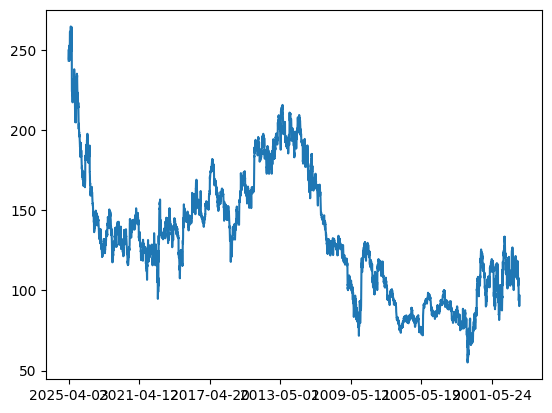

In [30]:
ohlc_df['4. close'].plot()

<Axes: >

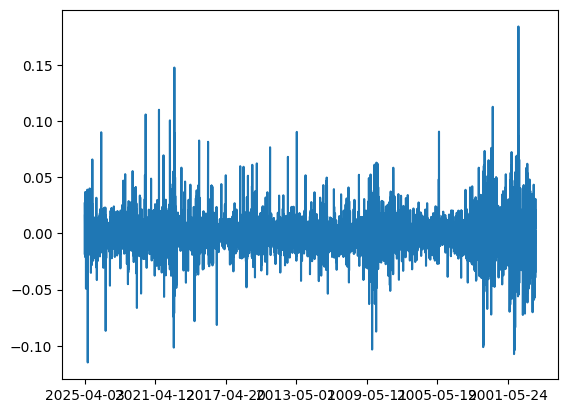

In [29]:
ohlc_df['4. close'].pct_change().plot()

In [40]:
shares = pd.DataFrame(columns=['Ticker', 'Shares', 'Purchase Price'])
shares['Ticker'] = ['IBM']
shares['Shares'] = [150]
shares['Purchase Price'] = [100]
shares

,Ticker,Shares,Purchase Price
0,IBM,150,100


In [56]:
portfolio = pd.DataFrame(columns=['Ticker', 'Total Value', 'Gain'])
portfolio.loc['IBM', 'Total Value'] = shares.loc[:, 'Shares'] * ohlc_df.loc['2025-04-03', '4. close']
y = shares.loc[:, 'Shares'] * ohlc_df.loc['2025-04-03', '4. close']

# portfolio
# shares.loc[:, 'Shares']

ValueError: Incompatible indexer with Series